In [2]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
df = pd.read_csv('dba.csv', names = ['variance','skewness',' curtosis','entropy','class'])

In [4]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [6]:
df.shape

(1372, 5)

In [7]:
df.isnull().sum()

variance     0
skewness     0
 curtosis    0
entropy      0
class        0
dtype: int64

In [8]:
df.dtypes

variance     float64
skewness     float64
 curtosis    float64
entropy      float64
class          int64
dtype: object

In [9]:
dfcor = df.corr()
dfcor

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


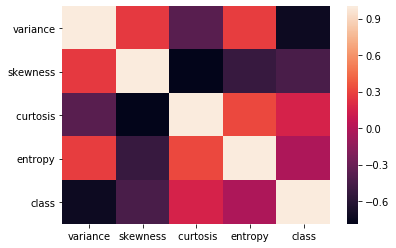

In [10]:
sns.heatmap(dfcor)

In [11]:
print(df.groupby('class').size())

class
0    762
1    610
dtype: int64


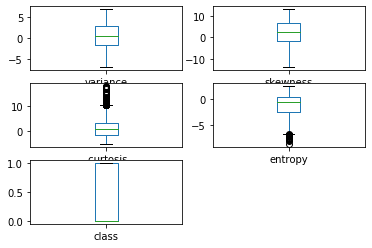

In [12]:
df.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False)
pyplot.show()

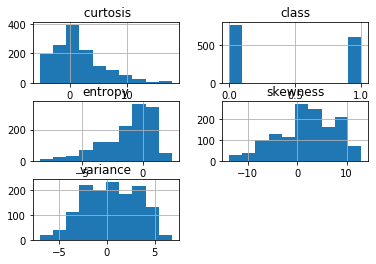

In [13]:
df.hist()
pyplot.show()

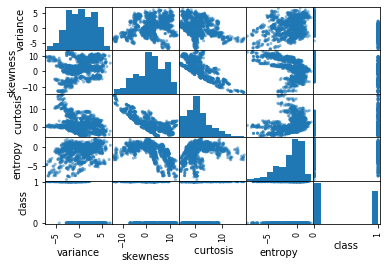

In [14]:
scatter_matrix(df)
pyplot.show()

In [15]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[1.12180565, 1.14945512, 0.97597007, 0.35456135, 0.89472059],
       [1.44706568, 1.06445293, 0.89503626, 0.12876744, 0.89472059],
       [1.20780971, 0.77735215, 0.12221838, 0.61807317, 0.89472059],
       ...,
       [1.47235682, 2.62164576, 3.75901744, 0.75488418, 1.11766736],
       [1.40669251, 1.75647104, 2.552043  , 0.04315848, 1.11766736],
       [1.04712236, 0.43982168, 0.29861555, 1.1364645 , 1.11766736]])

In [16]:
threshold = 3
print(np.where(z>3))

(array([  45,   47,  194,  202,  291,  394,  465,  529,  562,  581,  740,
        765,  820,  826,  881,  887,  942,  948,  974, 1003, 1009, 1064,
       1070, 1125, 1131, 1142, 1186, 1192, 1203, 1218, 1247, 1253, 1264,
       1308, 1314, 1369], dtype=int64), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2], dtype=int64))


In [17]:
df2 = df[(z < 3).all(axis=1)]

In [18]:
df.shape

(1372, 5)

In [19]:
df2.shape

(1336, 5)

In [20]:
x = df2.iloc[:,0:-1]
x

,variance,skewness,curtosis,entropy
0,3.621600,8.666100,-2.807300,-0.446990
1,4.545900,8.167400,-2.458600,-1.462100
2,3.866000,-2.638300,1.924200,0.106450
3,3.456600,9.522800,-4.011200,-3.594400
4,0.329240,-4.455200,4.571800,-0.988800
5,4.368400,9.671800,-3.960600,-3.162500
6,3.591200,3.012900,0.728880,0.564210
7,2.092200,-6.810000,8.463600,-0.602160
8,3.203200,5.758800,-0.753450,-0.612510
9,1.535600,9.177200,-2.271800,-0.735350


In [21]:
y = df2.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1341    1
1342    1
1343    1
1344    1
1345    1
1346    1
1347    1
1348    1
1349    1
1350    1
1351    1
1352    1
1353    1
1354    1
1355    1
1356    1
1357    1
1358    1
1359    1
1360    1
1361    1
1362    1
1363    1
1364    1
1365    1
1366    1
1367    1
1368    1
1370    1
1371    1
Name: class, Length: 1336, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=10)

In [23]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.987500 (0.009682)
LDA: 0.972531 (0.012254)
KNN: 1.000000 (0.000000)
CART: 0.981296 (0.016003)
NB: 0.846420 (0.034566)
SVM: 1.000000 (0.000000)


In [24]:
knn = KNeighborsClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=1)
cv_results = cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')

In [25]:
cv_results

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [27]:
test_pred = knn.predict(X_test)
test_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,

In [28]:
accuracy_score(y_test, test_pred)

1.0

In [29]:
print('actual',y_test)
print('predicted',test_pred)

actual 995     1
848     1
310     0
126     0
1340    1
1202    1
576     0
675     0
275     0
330     0
1096    1
1277    1
417     0
222     0
573     0
111     0
1252    1
1334    1
249     0
627     0
537     0
910     1
125     0
207     0
1168    1
1243    1
825     1
227     0
309     0
1293    1
       ..
354     0
1       0
486     0
533     0
254     0
729     0
75      0
880     1
964     1
1160    1
699     0
1354    1
1251    1
10      0
280     0
196     0
817     1
601     0
511     0
801     1
980     1
440     0
919     1
449     0
46      0
1039    1
703     0
390     0
1048    1
1234    1
Name: class, Length: 535, dtype: int64
predicted [1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0
 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1
 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1

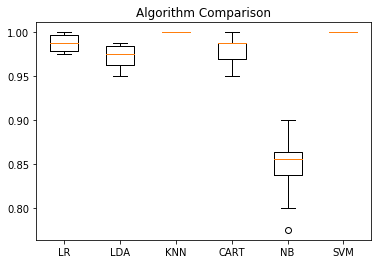

In [30]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [31]:
print(confusion_matrix(y_test,test_pred))

[[301   0]
 [  0 234]]


In [32]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       1.00      1.00      1.00       234

    accuracy                           1.00       535
   macro avg       1.00      1.00      1.00       535
weighted avg       1.00      1.00      1.00       535



In [33]:
from sklearn.externals import joblib
joblib.dump(knn,'Project17_Banknote.pkl')

['Project17_Banknote.pkl']